In [1]:
import pyspark
from pyspark.sql import SQLContext

conf = pyspark.SparkConf()

conf.set("spark.driver.memory","20g")
conf.set("spark.executor.memory","20g")
conf.set("spark.driver.cores","4")
conf.set("spark.num.executors","6")
conf.set("spark.executor.cores","4")
conf.set('spark.driver.memory','4g')
sc = pyspark.SparkContext(conf=conf)

sqlContext = SQLContext(sc)
spark = pyspark.SQLContext.getOrCreate(sc)
spark

C:\Users\pital\anaconda3\lib\site-packages\pyspark\sql\context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
C:\Users\pital\anaconda3\lib\site-packages\pyspark\sql\context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [2]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.datastax.spark:spark-cassandra-connector_2.11:2.3.0 --conf spark.cassandra.connection.host=127.0.0.1 pyspark-shell'

def load_and_get_table_df(keys_space_name, table_name):
    table_df = sqlContext.read\
        .format("org.apache.spark.sql.cassandra")\
        .options(table=table_name, keyspace=keys_space_name)\
        .load()
    return table_df


reviews = load_and_get_table_df("yelp", "reviews")
business = load_and_get_table_df("yelp", "businesses")

Py4JJavaError: An error occurred while calling o40.load.
: java.lang.ClassNotFoundException: 
Failed to find data source: org.apache.spark.sql.cassandra. Please find packages at
https://spark.apache.org/third-party-projects.html
       
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedToFindDataSourceError(QueryExecutionErrors.scala:574)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:675)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSourceV2(DataSource.scala:725)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:207)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:171)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:78)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:567)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:831)
Caused by: java.lang.ClassNotFoundException: org.apache.spark.sql.cassandra.DefaultSource
	at java.base/java.net.URLClassLoader.findClass(URLClassLoader.java:433)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:586)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:519)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$lookupDataSource$5(DataSource.scala:661)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.sql.execution.datasources.DataSource$.$anonfun$lookupDataSource$4(DataSource.scala:661)
	at scala.util.Failure.orElse(Try.scala:224)
	at org.apache.spark.sql.execution.datasources.DataSource$.lookupDataSource(DataSource.scala:661)
	... 15 more


## Cleaning sample_businesses.json dataset

In [ ]:
business.printSchema()
business.show()
business.count()

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

36876

In [ ]:
# DataSet contains data from US and Canada, We will be focusing only on US 

states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

business = business.filter(business.state.isin(states))
business.show() 
business.count()

+--------------------+--------------------+--------------------+--------------------+------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|        city|               hours|is_open|     latitude|     longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+
|         935 Race St|{null, null, u'no...|MTSW4McQd7CbVtyjq...|Restaurants, Food...|Philadelphia|{7:0-21:0, 7:0-20...|      1|   39.9555052|   -75.1555641|  St Honore Pastries|      19107|          80|  4.0|   PA|
|   8025 Mackenzie Rd|{null, null, u'fu...|k0hlBqXX-Bt0vf1op...|Pubs, Restaurants...|      Affton|                null|      0|   38.5651648

35592

In [ ]:
# Selecting only those businesses which are Restaurants 
us_restaurants = business.filter(business.categories.contains("Restaurants"))
us_restaurants.show()
us_restaurants.count()

+--------------------+--------------------+--------------------+--------------------+------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|        city|               hours|is_open|     latitude|     longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+
|         935 Race St|{null, null, u'no...|MTSW4McQd7CbVtyjq...|Restaurants, Food...|Philadelphia|{7:0-21:0, 7:0-20...|      1|   39.9555052|   -75.1555641|  St Honore Pastries|      19107|          80|  4.0|   PA|
|   8025 Mackenzie Rd|{null, null, u'fu...|k0hlBqXX-Bt0vf1op...|Pubs, Restaurants...|      Affton|                null|      0|   38.5651648

35592

In [ ]:
us_restaurants.select('categories').show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------+
|categories                                                                                                                                                 |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------+
|Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries                                                                                                      |
|Pubs, Restaurants, Italian, Bars, American (Traditional), Nightlife, Greek                                                                                 |
|Ice Cream & Frozen Yogurt, Fast Food, Burgers, Restaurants, Food                                                                                           |
|Vietnamese, Food, Restaurants, Food Trucks         

In [ ]:
# We will be focusing only on following categories and tag our restaurants based on these 
# Thus we are cleaning the data and adding a new column called category which defines the type of cusine the restaurant serves

from pyspark.sql.functions import when, lit

filtered_restaurants = us_restaurants.withColumn("category", \
   when((business.categories.contains("American")), lit("American")) \
   .when((business.categories.contains("Mexican")), lit("Mexican")) \
   .when((business.categories.contains("Italian")), lit("Italian")) \
   .when((business.categories.contains("Japanese")), lit("Japanese")) \
   .when((business.categories.contains("Chinese")), lit("Chinese")) \
   .when((business.categories.contains("Thai")), lit("Thai")) \
   .when((business.categories.contains("Mediterranean")), lit("Mediterranean")) \
   .when((business.categories.contains("French")), lit("French")) \
   .when((business.categories.contains("Vietnamese")), lit("Vietnamese")) \
   .when((business.categories.contains("Greek")), lit("Greek")) \
   .when((business.categories.contains("Indian")), lit("Indian")) \
   .when((business.categories.contains("Korean")), lit("Korean")) \
   .when((business.categories.contains("Hawaiian")), lit("Hawaiian")) \
   .when((business.categories.contains("African")), lit("African")) \
   .when((business.categories.contains("Spanish")), lit("Spanish")) \
   .when((business.categories.contains("Middle_eastern")), lit("Middle_eastern")) \
     .otherwise(lit(None)) )

filtered_restaurants.show()

+--------------------+--------------------+--------------------+--------------------+------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+----------+
|             address|          attributes|         business_id|          categories|        city|               hours|is_open|     latitude|     longitude|                name|postal_code|review_count|stars|state|  category|
+--------------------+--------------------+--------------------+--------------------+------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+----------+
|         935 Race St|{null, null, u'no...|MTSW4McQd7CbVtyjq...|Restaurants, Food...|Philadelphia|{7:0-21:0, 7:0-20...|      1|   39.9555052|   -75.1555641|  St Honore Pastries|      19107|          80|  4.0|   PA|      null|
|   8025 Mackenzie Rd|{null, null, u'fu...|k0hlBqXX-Bt0vf1op...|Pubs, Restaurants...|      Affto

In [ ]:
#Filtering and dropping all rows which do not belong to any 1 of the selected category
filtered_restaurants=filtered_restaurants.na.drop(subset=["category"])
filtered_restaurants.show()
filtered_restaurants.count()

+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+----------+
|             address|          attributes|         business_id|          categories|         city|               hours|is_open|     latitude|     longitude|                name|postal_code|review_count|stars|state|  category|
+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+----------+
|   8025 Mackenzie Rd|{null, null, u'fu...|k0hlBqXX-Bt0vf1op...|Pubs, Restaurants...|       Affton|                null|      0|   38.5651648|   -90.3210868|Tsevi's Pub And G...|      63123|          19|  3.0|   MO|  American|
|                    |{null, null, 'non...|eEOYSgkmpB90uNA7l...|Vietnamese, Food,...|    Tam

21734

In [ ]:
#checking if there are duplicates
filtered_restaurants.groupby(['business_id']).count().where('count > 1').sort('count', ascending=False).show()

+-----------+-----+
|business_id|count|
+-----------+-----+
+-----------+-----+



## Cleaning 200k_sample_reviews.json dataset

In [ ]:
reviews.printSchema()
reviews.show()
reviews.count()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|aQgBYZMH7yrkQVXDP...|   0|2020-12-01 13:45:24|    0|MgT7fYUteUYahmuJ6...|  5.0|As a local New Or...|     1|kvHFjFFU0bxwDPsvK...|
|MfWGs8TvGI0vSvGsz...|   2|2020-07-29 21:10:01|    0|joNamNgy54u6O_KVi...|  5.0|This has been my ...|     3|dKXg01uJ_o68KxhiK...|
|qesrSL

200000

In [ ]:
# Dropping any rows if it contains null value
reviews=reviews.na.drop()
reviews.count()

200000

In [ ]:
# Joining reviews and filtered_restaurants to create a new merged dataframe

# Renaming stars column in filtered_restaurants to avg_stars before join
filtered_restaurants = filtered_restaurants.withColumnRenamed("stars","avg_stars")

restaurant_reviews = reviews.join(filtered_restaurants,reviews.business_id == filtered_restaurants.business_id,"inner")
restaurant_reviews.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: 

In [ ]:
restaurant_reviews.count()

135151

In [ ]:
# Removing special chaarcter from review text 
from pyspark.sql import functions as f
restaurant_reviews = restaurant_reviews.withColumn("text", f.regexp_replace(restaurant_reviews["text"], '[^A-Za-z0-9_\\s+]', ""))
restaurant_reviews = restaurant_reviews.withColumn('review_length', f.size(f.split(f.col('text'), ' ')))
restaurant_reviews.show()

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+---------+-----+--------+-------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|             address|          attributes|         business_id|          categories|           city|               hours|is_open|     latitude|     longitude|                name|postal_code|review_count|avg_stars|state|category|review_length|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+----

In [ ]:
# label reviews as positive or negative
# marking neutral reviews as None to be dropped later

restaurant_reviews = restaurant_reviews.withColumn("labels", \
   when((restaurant_reviews.stars >= 4 ), lit("positive")) \
   .when((restaurant_reviews.stars < 3 ), lit("negative")) \
     .otherwise(lit(None)) )

restaurant_reviews=restaurant_reviews.na.drop(subset=["labels"])
restaurant_reviews.show()
restaurant_reviews.count()

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+---------+-----+--------+-------------+--------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|             address|          attributes|         business_id|          categories|           city|               hours|is_open|     latitude|     longitude|                name|postal_code|review_count|avg_stars|state|category|review_length|  labels|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+-------

119324

In [ ]:
import pandas as pd
import seaborn as sns
import requests, re
import pandas as pd
import seaborn as sns
import nltk
import string, itertools
from collections import Counter, defaultdict
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Exploratory Data Analysis
## Restaurants Distribution
### Distribution of restaurants in each category

+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+---------+-----+--------+-------------+--------+
|cool|               date|funny|           review_id|stars|                text|useful|             user_id|             address|          attributes|         business_id|          categories|           city|               hours|is_open|     latitude|     longitude|                name|postal_code|review_count|avg_stars|state|category|review_length|  labels|
+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+-------+-------------+--------------+------------

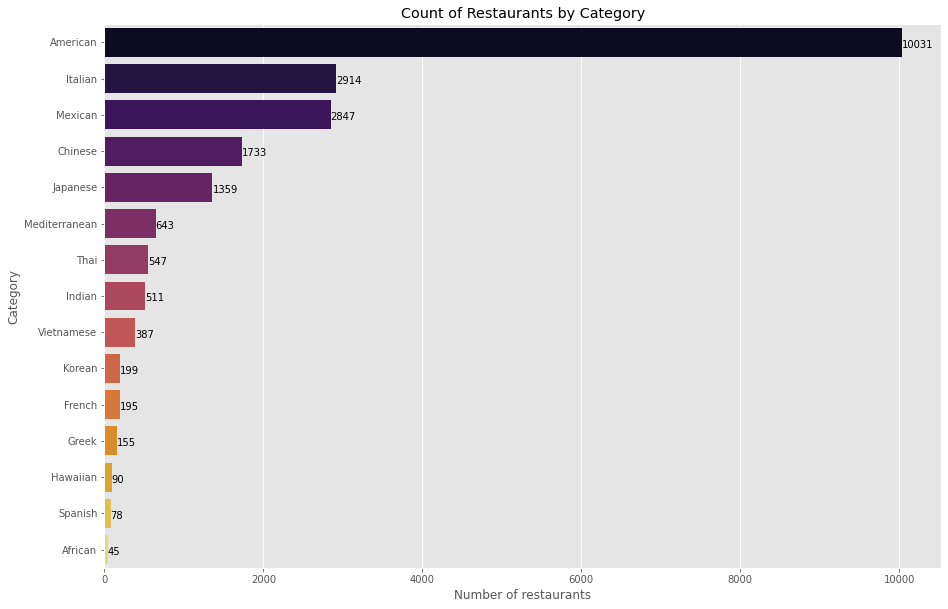

In [ ]:
plt.style.use('ggplot')

df = filtered_restaurants.toPandas()



df_cols = restaurant_reviews.columns
# get index of the duplicate columns
duplicate_col_index = list(set([df_cols.index(c) for c in df_cols if df_cols.count(c) == 2]))

# rename by adding suffix '_duplicated'
for i in duplicate_col_index:
    df_cols[i] = df_cols[i] + '_duplicated'

# rename the column in DF
restaurant_reviews = restaurant_reviews.toDF(*df_cols)
data_reviews=restaurant_reviews.toPandas()

# remove flagged columns
cols_to_remove = [c for c in df_cols if '_duplicated' in c]
restaurant_reviews.drop(*cols_to_remove).show()

plt.figure(figsize=(15,10))

grouped = df.category.value_counts()

sns.countplot(y='category',data=df, order = grouped.index, palette = sns.color_palette("inferno", len(grouped)))
plt.xlabel('Number of restaurants')
plt.ylabel('Category')
plt.title('Count of Restaurants by Category')

for  i, v in enumerate(df.category.value_counts()):
    plt.text(v, i+0.15, str(v))

### Top 10 cities with most restaurants

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


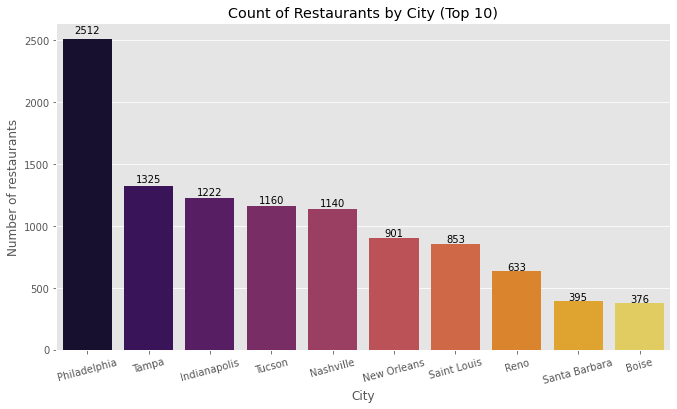

In [ ]:
plt.figure(figsize=(11,6))

grouped = df.city.value_counts()[:10]

sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("inferno", len(grouped)))
plt.ylabel('Number of restaurants')
plt.xlabel('City')
plt.title('Count of Restaurants by City (Top 10)')
plt.xticks(rotation=15)

for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center')

In [ ]:
## 


In [ ]:

data_reviews.columns

Index(['business_id_duplicated', 'cool', 'date', 'funny', 'review_id', 'stars',
       'text', 'useful', 'user_id', 'address', 'attributes', 'business_id',
       'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude',
       'name', 'postal_code', 'review_count', 'avg_stars', 'state', 'category',
       'review_length', 'labels'],
      dtype='object')

In [ ]:
restaurant_reviews.columns

['business_id_duplicated',
 'cool',
 'date',
 'funny',
 'review_id',
 'stars',
 'text',
 'useful',
 'user_id',
 'address',
 'attributes',
 'business_id',
 'categories',
 'city',
 'hours',
 'is_open',
 'latitude',
 'longitude',
 'name',
 'postal_code',
 'review_count',
 'avg_stars',
 'state',
 'category',
 'review_length',
 'labels']

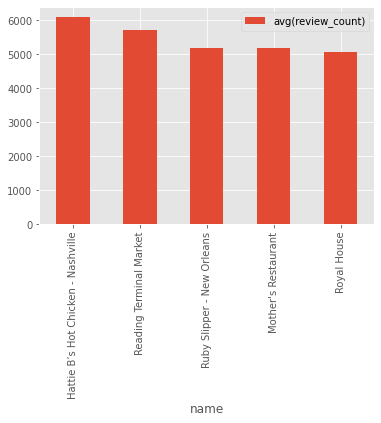

In [ ]:
# Average review count for restaurants with positive ratings
from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))


restaurant_reviews.filter(restaurant_reviews.labels == "positive").groupby("name").mean().select("name","avg(review_count)").sort("avg(review_count)",ascending=False).toPandas().set_index('name')[:5].plot(kind='bar',legend=True)

In [ ]:
# Average review count for restaurants with positive ratings per state
restaurant_reviews.filter(restaurant_reviews.labels == "positive").groupby("name","state").mean().select("name","state","avg(review_count)").sort("avg(review_count)",ascending=False).toPandas()

,name,state,avg(review_count)
0,Hattie B’s Hot Chicken - Nashville,TN,6093.0
1,Reading Terminal Market,PA,5721.0
2,Ruby Slipper - New Orleans,LA,5193.0
3,Mother's Restaurant,LA,5185.0
4,Royal House,LA,5070.0
...,...,...,...
15948,Five Star Restaurant,PA,5.0
15949,Haggerty's Cafe,PA,5.0
15950,B2 Country Saloon,IN,5.0
15951,Four Seasons Vietnamese Restraurant,MO,5.0


In [ ]:
data_reviews.columns

Index(['business_id_duplicated', 'cool', 'date', 'funny', 'review_id', 'stars',
       'text', 'useful', 'user_id', 'address', 'attributes', 'business_id',
       'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude',
       'name', 'postal_code', 'review_count', 'avg_stars', 'state', 'category',
       'review_length', 'labels'],
      dtype='object')

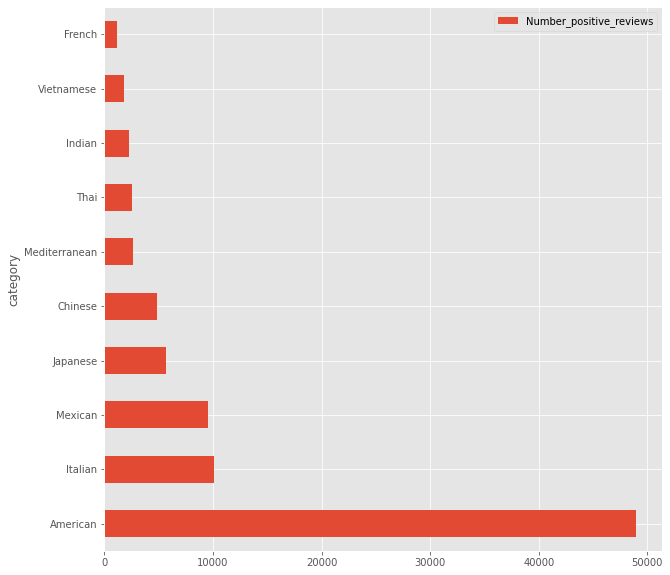

In [ ]:
# Maximum number of positive reviews per category

pos_reviews_num=restaurant_reviews.filter(restaurant_reviews.labels == "positive").groupby("category").count().withColumnRenamed("count","Number_positive_reviews").sort("Number_positive_reviews",ascending=False).toPandas()
pos_reviews_num.set_index('category')[:10].plot(kind='barh',legend=True, figsize=(10,10))



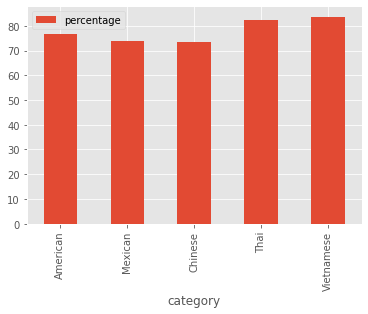

In [ ]:
# percentage of positive reviews per category



f=pos_reviews_num.set_index('category')[:10]
temp=restaurant_reviews.groupby("category").count().withColumnRenamed("count","total_reviews").sort("total_reviews",ascending=False).toPandas().set_index('category')[:10]

f['total_review_count']=temp
f['percentage']= (f['Number_positive_reviews']/f['total_review_count'])*100
f['percentage'][::2].plot(kind='bar',legend=True)

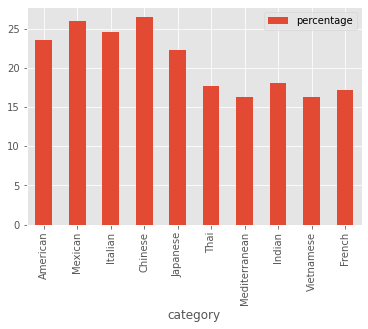

In [ ]:
# percentage of negative reviews per category


neg_rev_num=restaurant_reviews.filter(restaurant_reviews.labels == "negative").groupby("category").count().withColumnRenamed("count","Number_negative_reviews").sort("Number_negative_reviews",ascending=False).toPandas()

k=neg_rev_num.set_index('category')[:10]
temp=restaurant_reviews.groupby("category").count().withColumnRenamed("count","total_reviews").sort("total_reviews",ascending=False).toPandas().set_index('category')[:10]

k['total_review_count']=temp
k['percentage']= (k['Number_negative_reviews']/f['total_review_count'])*100
k['percentage'][:].plot(kind='bar',legend=True)

In [ ]:
print(data_reviews.columns)
restaurant_reviews.columns

Index(['business_id_duplicated', 'cool', 'date', 'funny', 'review_id', 'stars',
       'text', 'useful', 'user_id', 'address', 'attributes', 'business_id',
       'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude',
       'name', 'postal_code', 'review_count', 'avg_stars', 'state', 'category',
       'review_length', 'labels'],
      dtype='object')


['business_id_duplicated',
 'cool',
 'date',
 'funny',
 'review_id',
 'stars',
 'text',
 'useful',
 'user_id',
 'address',
 'attributes',
 'business_id',
 'categories',
 'city',
 'hours',
 'is_open',
 'latitude',
 'longitude',
 'name',
 'postal_code',
 'review_count',
 'avg_stars',
 'state',
 'category',
 'review_length',
 'labels']

In [ ]:
data_reviews.attributes[0]

Row(AcceptsInsurance=None, AgesAllowed=None, Alcohol="u'none'", Ambience="{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}", BYOB='True', BYOBCorkage=None, BestNights=None, BikeParking='True', BusinessAcceptsBitcoin='False', BusinessAcceptsCreditCards='True', BusinessParking="{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}", ByAppointmentOnly=None, Caters='True', CoatCheck=None, Corkage='False', DietaryRestrictions=None, DogsAllowed='True', DriveThru=None, GoodForDancing=None, GoodForKids=None, GoodForMeal=None, HairSpecializesIn=None, HappyHour=None, HasTV='False', Music=None, NoiseLevel=None, Open24Hours=None, OutdoorSeating='True', RestaurantsAttire=None, RestaurantsCounterService=None, RestaurantsDelivery='False', RestaurantsGoodForGroups=None, RestaurantsPriceRange2=None, RestaurantsReservations='False', RestaurantsTableService='True', 

In [ ]:
restaurant_reviews.groupby('labels').count().show()

+--------+-----+
|  labels|count|
+--------+-----+
|positive|91680|
|negative|27644|
+--------+-----+



In [ ]:
neg_rev_num

,category,Number_positive_reviews
0,American,15057
1,Mexican,3359
2,Italian,3304
3,Chinese,1726
4,Japanese,1645
5,Thai,538
6,Mediterranean,511
7,Indian,493
8,Vietnamese,343
9,French,232


,Number_negative_reviews
name,
Applebee's Grill + Bar,153
Dadz Bar & Grill,4
Tony Roni's Pizza Plymouth Meeting,1
Cedar Lounge,1
Twilight Tavern,1
...,...
Tacos De Oro,1
Danny's Wok 3,1
Taziki's Mediterranean Cafe - Tampa,1


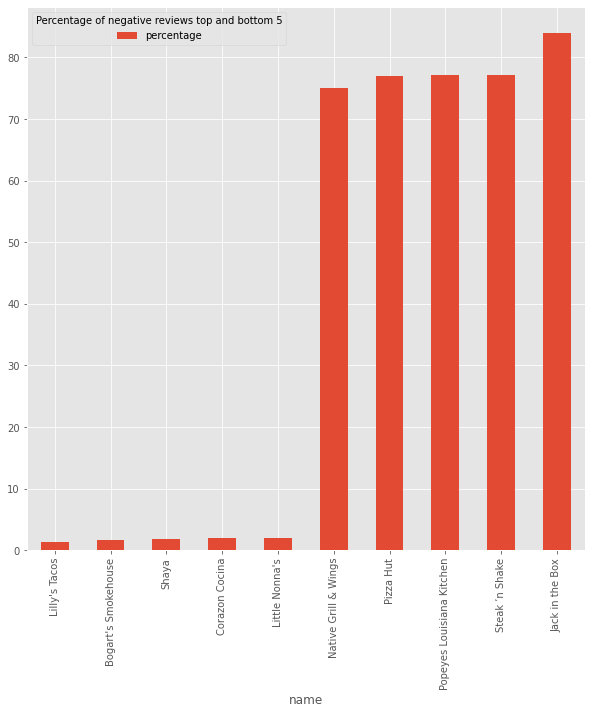

In [ ]:
#Percentage of negative reviews top and bottom 5
neg_rev_num=restaurant_reviews.filter(restaurant_reviews.labels == "negative").groupby("name").count().withColumnRenamed("count","Number_negative_reviews").toPandas().set_index('name')
neg_rev_num
temp=restaurant_reviews.groupby("name").count().withColumnRenamed("count","total_reviews").toPandas().set_index('name')
temp
neg_rev_num['total_review_count']=temp
neg_rev_num
neg_rev_num['percentage']= (neg_rev_num['Number_negative_reviews']/neg_rev_num['total_review_count'])*100

neg_rev_num=neg_rev_num.sort_values("percentage")

neg_rev_num.head(5).append(neg_rev_num[neg_rev_num.total_review_count>20].tail(5))['percentage'][:].plot(kind='bar',figsize=(10,10)).legend(title='Percentage of negative reviews top and bottom 5')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


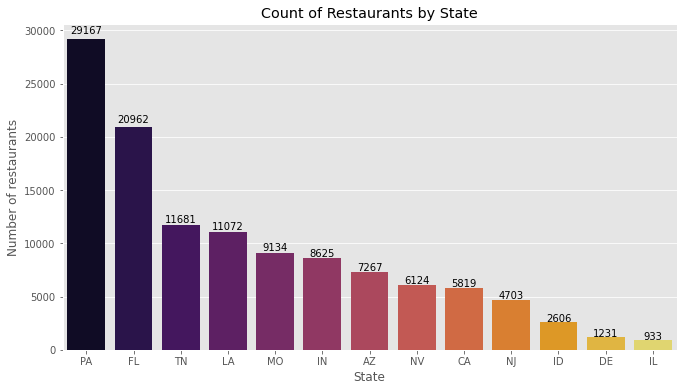

In [ ]:
plt.figure(figsize=(11,6))

grouped = data_reviews.state.value_counts()

sns.barplot(grouped.index, grouped.values,palette=sns.color_palette("inferno", len(grouped)) )
plt.ylabel('Number of restaurants')
plt.xlabel('State')
plt.title('Count of Restaurants by State')

for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center')

### Distribution of restaurants in each state

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


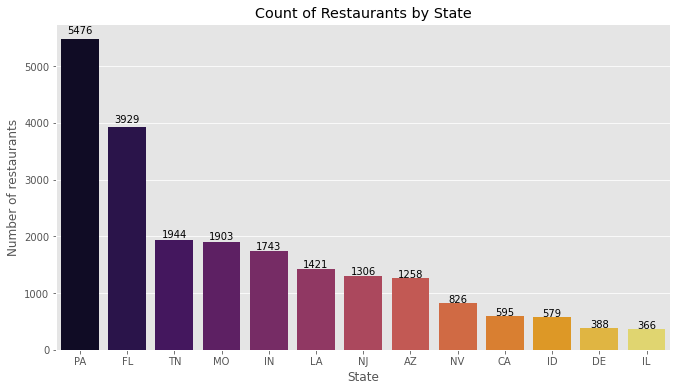

In [ ]:
plt.figure(figsize=(11,6))

grouped = df.state.value_counts()

sns.barplot(grouped.index, grouped.values,palette=sns.color_palette("inferno", len(grouped)) )
plt.ylabel('Number of restaurants')
plt.xlabel('State')
plt.title('Count of Restaurants by State')

for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center')

## Reviews Distribution
### Distribution of reviews by cuisine type

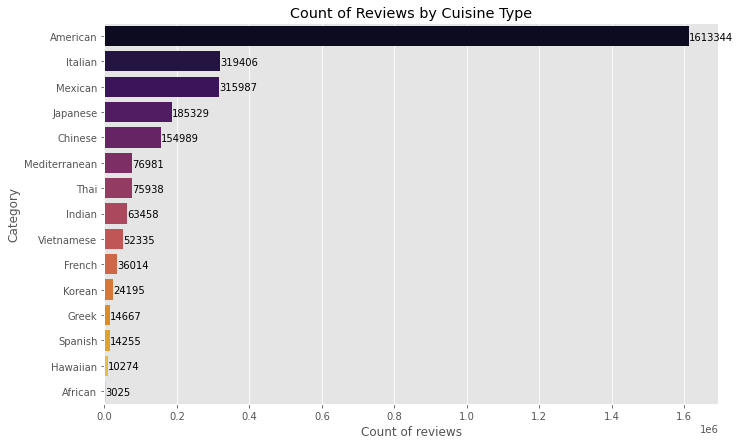

In [ ]:
plt.figure(figsize=(11,7))
grouped = df.groupby('category')['review_count'].sum().sort_values(ascending = False)

sns.barplot(y=grouped.index, x = grouped.values, palette = sns.color_palette("inferno", len(grouped)) )

plt.ylabel('Category')
plt.xlabel('Count of reviews')
plt.title('Count of Reviews by Cuisine Type')

for i,v in enumerate(grouped):
    plt.text(v, i+0.15, str(v))


### Top 10 cities with most reviews

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


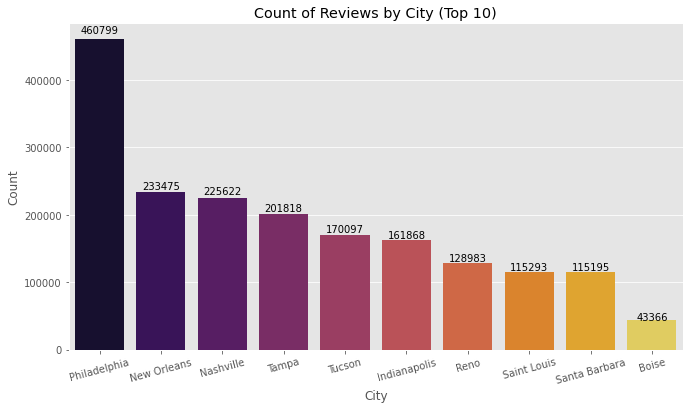

In [ ]:
plt.figure(figsize=(11,6))

grouped = df.groupby('city')['review_count'].sum().sort_values(ascending=False)[:10]

sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("inferno", len(grouped)) )
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Count of Reviews by City (Top 10)')

plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center')

### Top 9 restaurants with most reviews

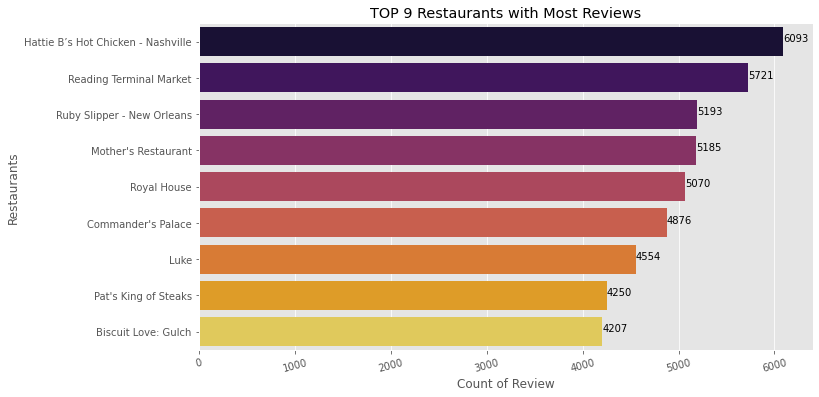

In [ ]:
plt.figure(figsize=(11,6))

grouped = df[['name','review_count']].sort_values(by='review_count', ascending=False)[:9]

sns.barplot(x=grouped.review_count, y = grouped.name, palette=sns.color_palette("inferno", len(grouped)), ci=None)
plt.xlabel('Count of Review')
plt.ylabel('Restaurants')
plt.title('TOP 9 Restaurants with Most Reviews')

plt.xticks(rotation=15)
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v))

###  Average length of reviews

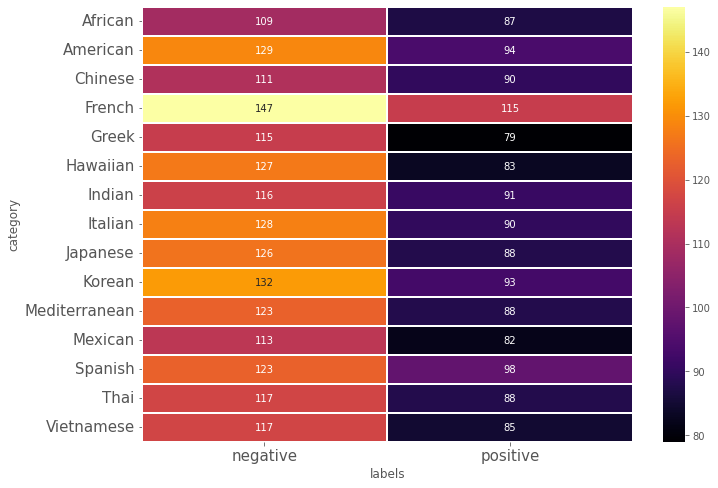

In [ ]:
df_rr = restaurant_reviews.toPandas()

table = df_rr.groupby(['category','labels'])['review_length'].mean().round().unstack()
plt.figure(figsize=(11,8))

sns.heatmap(table, cmap='inferno', fmt='g',annot=True, linewidths=1)

plt.tick_params(labelsize=15)

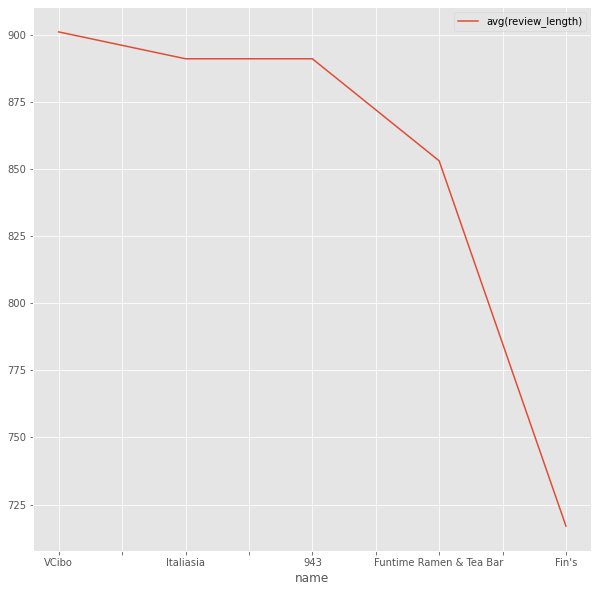

In [ ]:
# Top 5 restaurants with longest reviews
restaurant_reviews.groupby("name").mean().select("name","avg(review_length)").sort("avg(review_length)",ascending=False).toPandas().set_index('name')[:5].plot(figsize=(10, 10),legend=True)

## Ratings Distribution
### Distribution of average ratings by restaurants

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


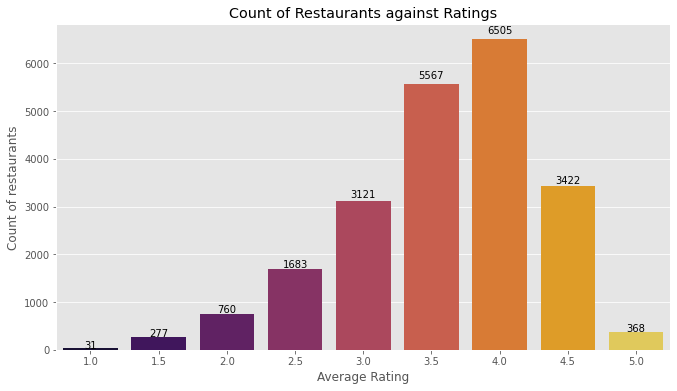

In [ ]:
plt.figure(figsize=(11,6))

grouped = df.avg_stars.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("inferno", len(grouped)))
plt.xlabel('Average Rating')
plt.ylabel('Count of restaurants')
plt.title('Count of Restaurants against Ratings')

for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center')

### Distribution of ratings by reviews

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


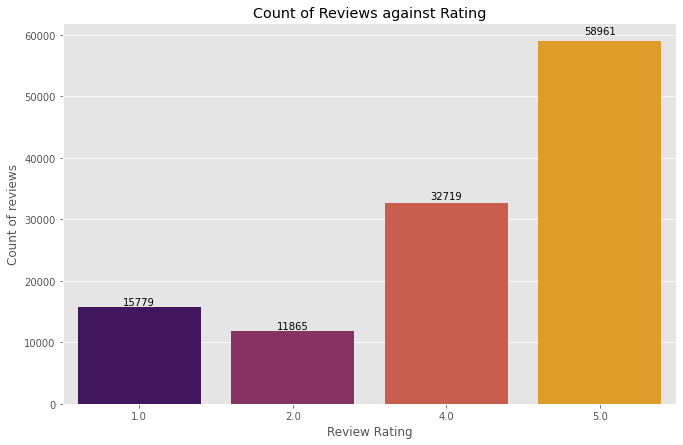

In [ ]:
plt.figure(figsize=(11,7))

grouped = df_rr.stars.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("inferno", len(grouped)))

plt.xlabel('Review Rating')
plt.ylabel('Count of reviews')
plt.title('Count of Reviews against Rating')

for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center')

## Review Analysis

### Positive words and negative words

In [ ]:
import csv
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

In [ ]:
## convert text to lower case
from pyspark.sql.functions import lower, col
restaurant_reviews = restaurant_reviews.withColumn("text", lower(restaurant_reviews["text"]))
restaurant_reviews.show()



+----------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+---------+-----+--------+-------------+--------+
|business_id_duplicated|cool|               date|funny|           review_id|stars|                text|useful|             user_id|             address|          attributes|         business_id|          categories|           city|               hours|is_open|     latitude|     longitude|                name|postal_code|review_count|avg_stars|state|category|review_length|  labels|
+----------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------+-

In [ ]:
df=restaurant_reviews.select("text","labels")
df.show()

+--------------------+--------+
|                text|  labels|
+--------------------+--------+
|as a local new or...|positive|
|this has been my ...|positive|
|the atmosphere is...|negative|
|cant wait to get ...|positive|
|i am a vegetarian...|negative|
|i came here for m...|positive|
|quoted 10 minutes...|negative|
|lots of breweries...|positive|
|so me and my wife...|negative|
|best mexican food...|positive|
|i have been wanti...|positive|
|new owner have ta...|positive|
|quickly becoming ...|positive|
|i love this place...|positive|
|this is one of my...|positive|
|food was ok  noth...|negative|
|hanging out waiti...|positive|
|delicious my husb...|positive|
|delicious food my...|positive|
|we stopped in on ...|positive|
+--------------------+--------+
only showing top 20 rows



In [ ]:
df.select("text").show(5,truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|text                                                                                                                                                

In [ ]:
df = df.dropna()
df.count()

119324

In [ ]:
(train_set, val_set, test_set) = df.randomSplit([0.80, 0.10, 0.10], seed = 2000)

In [ ]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

tokenizer = Tokenizer(inputCol="text", outputCol="words")
hashtf = HashingTF(numFeatures=2**16, inputCol="words", outputCol='tf')
idf = IDF(inputCol='tf', outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms
label_stringIdx = StringIndexer(inputCol = "labels", outputCol = "label")
pipeline = Pipeline(stages=[tokenizer, hashtf, idf, label_stringIdx])

pipelineFit = pipeline.fit(train_set)
train_df = pipelineFit.transform(train_set)
val_df = pipelineFit.transform(val_set)
train_df.show(30)

+--------------------+--------+--------------------+--------------------+--------------------+-----+
|                text|  labels|               words|                  tf|            features|label|
+--------------------+--------+--------------------+--------------------+--------------------+-----+
|                    |positive|                  []|(65536,[52572],[1...|(65536,[52572],[0...|  0.0|
|                  \n|positive|                  []|       (65536,[],[])|       (65536,[],[])|  0.0|
|\n\n\n\n 2012 dun...|positive|[, , , , , 2012, ...|(65536,[31058,387...|(65536,[31058,387...|  0.0|
|\n\n\nconcise rev...|positive|[, , , concise, r...|(65536,[178,1587,...|(65536,[178,1587,...|  0.0|
|\n\n\nwwwwwwwwwww...|negative|[, , , wwwwwwwwww...|(65536,[47183,525...|(65536,[47183,525...|  1.0|
|            \n\nin\n|positive|            [, , in]|(65536,[52572,542...|(65536,[52572,542...|  0.0|
|           \n       |positive|                  []|       (65536,[],[])|       (65536,[],[

In [ ]:
train_df.show(30)

In [ ]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(maxIter=100)
lrModel = lr.fit(train_df)
predictions = lrModel.transform(val_df)
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
evaluator.evaluate(predictions)

0.9492387754986952

In [ ]:
accuracy = predictions.filter(predictions.label == predictions.prediction).count() / float(val_set.count())
accuracy

0.9077800134138162

In [ ]:
from pyspark.ml.feature import CountVectorizer

tokenizer = Tokenizer(inputCol="text", outputCol="words")
cv = CountVectorizer(vocabSize=2**16, inputCol="words", outputCol='cv')
idf = IDF(inputCol='cv', outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms
label_stringIdx = StringIndexer(inputCol = "labels", outputCol = "label")
lr = LogisticRegression(maxIter=100)
pipeline = Pipeline(stages=[tokenizer, cv, idf, label_stringIdx, lr])

pipelineFit = pipeline.fit(train_set)
predictions = pipelineFit.transform(val_set)
accuracy = predictions.filter(predictions.label == predictions.prediction).count() / float(val_set.count())
roc_auc = evaluator.evaluate(predictions)

print("Accuracy Score: {0:.4f}".format(accuracy))
print("ROC-AUC: {0:.4f}".format(roc_auc))

Accuracy Score: 0.9136
ROC-AUC: 0.9531


In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 7.7 MB/s 


In [ ]:
import re
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import numpy as np
import string

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize   

from pyspark import SparkContext
from pyspark import SparkConf
from pyspark import SQLContext

from pyspark import HiveContext

from pyspark.sql.functions import udf
from pyspark.sql.types import *
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import Tokenizer
from pyspark.ml.feature import StopWordsRemover
from pyspark.ml.feature import HashingTF, IDF
from pyspark.ml.classification import LogisticRegression, NaiveBayes, GBTClassifier
from pyspark.mllib.classification import LogisticRegressionWithLBFGS, LogisticRegressionModel,LogisticRegressionWithSGD
from pyspark.mllib.regression import LabeledPoint
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from vaderSentiment import vaderSentiment
from pyspark.ml.feature import NGram
import matplotlib

In [ ]:
def toBinary(score):
    if score == 'positive': return 1
    else: return 0
udfScoretoBinary=udf(toBinary, StringType())

df = df.withColumn("Target", udfScoretoBinary("labels"))
df.show(4)

+--------------------+--------+------+
|                text|  labels|Target|
+--------------------+--------+------+
|as a local new or...|positive|     1|
|this has been my ...|positive|     1|
|the atmosphere is...|negative|     0|
|cant wait to get ...|positive|     1|
+--------------------+--------+------+
only showing top 4 rows



In [ ]:
#TEXT Pre-processing

##COnvert to lower
from pyspark.sql.functions import udf
from pyspark.sql.types import *

def lower(text):
    return text.lower()

lower_udf =udf(lower,StringType())


##Remove nonAscii
def strip_non_ascii(data_str):
#''' Returns the string without non ASCII characters'''
    stripped = (c for c in data_str if 0 < ord(c) < 127)
    return ''.join(stripped)
# setup pyspark udf function
strip_non_ascii_udf = udf(strip_non_ascii, StringType())

##FIx abbreviations
def fix_abbreviation(data_str):
    data_str = data_str.lower()
    data_str = re.sub(r'\bthats\b', 'that is', data_str)
    data_str = re.sub(r'\bive\b', 'i have', data_str)
    data_str = re.sub(r'\bim\b', 'i am', data_str)
    data_str = re.sub(r'\bya\b', 'yeah', data_str)
    data_str = re.sub(r'\bcant\b', 'can not', data_str)
    data_str = re.sub(r'\bdont\b', 'do not', data_str)
    data_str = re.sub(r'\bwont\b', 'will not', data_str)
    data_str = re.sub(r'\bid\b', 'i would', data_str)
    data_str = re.sub(r'wtf', 'what the fuck', data_str)
    data_str = re.sub(r'\bwth\b', 'what the hell', data_str)
    data_str = re.sub(r'\br\b', 'are', data_str)
    data_str = re.sub(r'\bu\b', 'you', data_str)
    data_str = re.sub(r'\bk\b', 'OK', data_str)
    data_str = re.sub(r'\bsux\b', 'sucks', data_str)
    data_str = re.sub(r'\bno+\b', 'no', data_str)
    data_str = re.sub(r'\bcoo+\b', 'cool', data_str)
    data_str = re.sub(r'rt\b', '', data_str)
    data_str = data_str.strip()
    return data_str


##Remove punctuations mentions and alphanumeric characters
def remove_features(data_str):
# compile regex
    url_re = re.compile('https?://(www.)?\w+\.\w+(/\w+)*/?')
    punc_re = re.compile('[%s]' % re.escape(string.punctuation))
    num_re = re.compile('(\\d+)')
    mention_re = re.compile('@(\w+)')
    alpha_num_re = re.compile("^[a-z0-9_.]+$")
# convert to lowercase
    data_str = data_str.lower()
# remove hyperlinks
    data_str = url_re.sub(' ', data_str)
# remove @mentions
    data_str = mention_re.sub(' ', data_str)
# remove puncuation
    data_str = punc_re.sub(' ', data_str)
# remove numeric 'words'
    data_str = num_re.sub(' ', data_str)
# remove non a-z 0-9 characters and words shorter than 1 characters
    list_pos = 0
    cleaned_str = ''
    for word in data_str.split():
        if list_pos == 0:
            if alpha_num_re.match(word):
                cleaned_str = word
            else:
                cleaned_str = ' '
        else:
            if alpha_num_re.match(word):
                cleaned_str = cleaned_str + ' ' + word
            else:
                cleaned_str += ' '
        list_pos += 1
# remove unwanted space, *.split() will automatically split on
# whitespace and discard duplicates, the " ".join() joins the
# resulting list into one string.
    return " ".join(cleaned_str.split())
# setup pyspark udf function



##Remove stop words
def remove_stops(data_str):
# expects a string
    stops = set(stopwords.words("english"))
    list_pos = 0
    cleaned_str = ''
    text = data_str.split()
    for word in text:
        if word not in stops:
# rebuild cleaned_str
            if list_pos == 0:
                cleaned_str = word
            else:
                cleaned_str = cleaned_str + ' ' + word
            list_pos += 1
    return cleaned_str


# Part-of-Speech Tagging
def tag_and_remove(data_str):
    cleaned_str = ' '
# noun tags
    nn_tags = ['NN', 'NNP', 'NNP', 'NNPS', 'NNS']
# adjectives
    jj_tags = ['JJ', 'JJR', 'JJS']
# verbs
    vb_tags = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    nltk_tags = nn_tags + jj_tags + vb_tags
# break string into 'words'
    text = data_str.split()
# tag the text and keep only those with the right tags
    tagged_text = pos_tag(text)
    for tagged_word in tagged_text:
        if tagged_word[1] in nltk_tags:
            cleaned_str += tagged_word[0] + ' '
    return cleaned_str


##Lemmatization
def lemmatize(data_str):
# expects a string
    list_pos = 0
    cleaned_str = ''
    lmtzr = WordNetLemmatizer()
    text = data_str.split()
    tagged_words = pos_tag(text)
    for word in tagged_words:
        if 'v' in word[1].lower():
            lemma = lmtzr.lemmatize(word[0], pos='v')
        else:
            lemma = lmtzr.lemmatize(word[0], pos='n')
        if list_pos == 0:
            cleaned_str = lemma
        else:
            cleaned_str = cleaned_str + ' ' + lemma
        list_pos += 1
    return cleaned_str

In [ ]:
lower_udf =udf(lower,StringType())
strip_non_ascii_udf = udf(strip_non_ascii, StringType())
fix_abbreviation_udf = udf(fix_abbreviation, StringType())
remove_features_udf = udf(remove_features, StringType())
remove_stops_udf = udf(remove_stops, StringType())
tag_and_remove_udf = udf(tag_and_remove, StringType())
lemmatize_udf = udf(lemmatize, StringType())

In [ ]:
df = df.withColumn("lower_text",lower_udf(df["Text"]))
df = df.withColumn("text_non_asci",fix_abbreviation_udf(df["lower_text"]))
df = df.withColumn("fixed_abbrev",fix_abbreviation_udf(df["text_non_asci"]))
df = df.withColumn('removed_features',remove_features_udf(df['fixed_abbrev']))
df.show(5,True)

+--------------------+--------+------+--------------------+--------------------+--------------------+--------------------+
|                text|  labels|Target|          lower_text|       text_non_asci|        fixed_abbrev|    removed_features|
+--------------------+--------+------+--------------------+--------------------+--------------------+--------------------+
|as a local new or...|positive|     1|as a local new or...|as a local new or...|as a local new or...|as a local new or...|
|this has been my ...|positive|     1|this has been my ...|this has been my ...|this has been my ...|this has been my ...|
|the atmosphere is...|negative|     0|the atmosphere is...|the atmosphere is...|the atmosphere is...|the atmosphere is...|
|cant wait to get ...|positive|     1|cant wait to get ...|can not wait to g...|can not wait to g...|can not wait to g...|
|i am a vegetarian...|negative|     0|i am a vegetarian...|i am a vegetarian...|i am a vegetarian...|i am a vegetarian...|
+---------------

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df = df.withColumnRenamed("text", "Text")
df_no_stop_words = df.withColumn("removed_stops", remove_stops_udf("removed_features")).select('Text','removed_stops','Target')
df_no_stop_words.show(5)

+--------------------+--------------------+------+
|                Text|       removed_stops|Target|
+--------------------+--------------------+------+
|as a local new or...|local new orleani...|     1|
|this has been my ...|go banh mi spot y...|     1|
|the atmosphere is...|atmosphere pleasa...|     0|
|cant wait to get ...|wait get back int...|     1|
|i am a vegetarian...|vegetarian ever c...|     0|
+--------------------+--------------------+------+
only showing top 5 rows



In [ ]:
df_pos_tagging=df_no_stop_words.withColumn("tag_and_remove_pos", tag_and_remove_udf("removed_stops")).select('Text','tag_and_remove_pos','Target')


In [ ]:
#Tokenizing the document
tokenizer = Tokenizer(inputCol="tag_and_remove_pos", outputCol="words")
wordsDataFrame = tokenizer.transform(df_pos_tagging)
for words_label in wordsDataFrame.select("words", "Target").take(3):
    print(words_label)

df_text = df.withColumn("text_lower",lower_udf(df["Text"])).select('text_lower','Target')

Row(words=['', 'local', 'new', 'orleanian', 'area', 'many', 'vietnamese', 'restaurants', 'choose', 'td', 'pho', 'house', 'moderneclectic', 'restaurant', 'combining', 'authentic', 'vietnamese', 'dishes', 'local', 'flavors', 'louisiana', 'located', 'west', 'bank', 'able', 'reap', 'benefits', 'lower', 'prices', 'compared', 'city', 'sacrificing', 'quality', 'customer', 'service', 'give', 'visit', 'leave', 'feeling', 'satisfied', 'full'], Target='1')
Row(words=['', 'go', 'banh', 'mi', 'spot', 'year', 'ride', 'harder', 'place', 'entering', 'youll', 'notice', 'woman', 'shop', 'keeps', 'kid', 'entertained', 'impressive', 'opinion', 'disappoint', 'get', 'banh', 'mi', 'dac', 'biet', 'time', 'cut', 'half', 'extra', 'carrots', 'daikon', 'adds', 'extra', 'charge', 'best', 'dac', 'biet', 'banh', 'mi', 'pinellas', 'county', 'shops', 'toasted', 'bun', 'great', 'flavor', 'bite', 'enjoy', 'thit', 'banh', 'mi', 'good', 'recommend', 'vietnamese', 'coffee', 'good', 'portions', 'great', 'love', 'place', 're

In [ ]:
remover = StopWordsRemover(inputCol="words", outputCol="words_filtered")
wordsDataFrame1 = remover.transform(wordsDataFrame).select("Target","words_filtered")
wordsDataFrame1.show(2)

+------+--------------------+
|Target|      words_filtered|
+------+--------------------+
|     1|[, local, new, or...|
|     1|[, go, banh, mi, ...|
+------+--------------------+
only showing top 2 rows



In [ ]:
df_text_lemma=df_pos_tagging.withColumn("lemmatized_text",lemmatize_udf("tag_and_remove_pos")).select('Text','lemmatized_text','Target')
df_text_lemma.show(5)

+--------------------+--------------------+------+
|                Text|     lemmatized_text|Target|
+--------------------+--------------------+------+
|as a local new or...|local new orleani...|     1|
|this has been my ...|go banh mi spot y...|     1|
|the atmosphere is...|pleasant well des...|     0|
|cant wait to get ...|wait get intimate...|     1|
|i am a vegetarian...|vegetarian come t...|     0|
+--------------------+--------------------+------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import monotonically_increasing_id
# Create Unique ID
df_text_lemma = df_text_lemma.withColumn("uid", monotonically_increasing_id())
df_text_lemma.show(4)

+--------------------+--------------------+------+---+
|                Text|     lemmatized_text|Target|uid|
+--------------------+--------------------+------+---+
|as a local new or...|local new orleani...|     1|  0|
|this has been my ...|go banh mi spot y...|     1|  1|
|the atmosphere is...|pleasant well des...|     0|  2|
|cant wait to get ...|wait get intimate...|     1|  3|
+--------------------+--------------------+------+---+
only showing top 4 rows



In [ ]:
# Preparing Data For Modelling
# a. Creating Final Dataset with apt columns

data = df_text_lemma.select('uid', 'lemmatized_text','Target')
#data=wordsDataFrame2
data.show(4)

+---+--------------------+------+
|uid|     lemmatized_text|Target|
+---+--------------------+------+
|  0|local new orleani...|     1|
|  1|go banh mi spot y...|     1|
|  2|pleasant well des...|     0|
|  3|wait get intimate...|     1|
+---+--------------------+------+
only showing top 4 rows



In [ ]:
#b. Dividing it into Training and Test Set
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Caching the RDD for training
trainingData
#Renaming features for modeling
training = trainingData.selectExpr("lemmatized_text as text", "Target as label")
training = training.withColumn("label", training["label"].cast(DoubleType()))

# Caching the RDD for test
testData
#Renaming features for modeling
test = testData.selectExpr("lemmatized_text as text", "Target as label")
test = test.withColumn("label", test["label"].cast(DoubleType()))

# c. Tokenizing the Training set anc creating TF-IDF matrix using HashingTF

tokenizer = Tokenizer(inputCol="text", outputCol="words")
hashingTF = HashingTF(inputCol=tokenizer.getOutputCol(), outputCol="hashing")
idf = IDF(inputCol=hashingTF.getOutputCol(), outputCol="features")

# 6. Modelling and Evaluating

## a. Logistic Regression Model

In [ ]:
lr = LogisticRegression(maxIter=10, regParam=0.01)
pipeline = Pipeline(stages=[tokenizer, hashingTF, idf, lr])
# Training the model
model = pipeline.fit(training)
#Predicing Output
prediction = model.transform(test)
prediction.select("label", "prediction").show(10,False)

+-----+----------+
|label|prediction|
+-----+----------+
|0.0  |0.0       |
|1.0  |1.0       |
|1.0  |1.0       |
|1.0  |1.0       |
|1.0  |1.0       |
|0.0  |0.0       |
|1.0  |1.0       |
|1.0  |1.0       |
|1.0  |1.0       |
|1.0  |1.0       |
+-----+----------+
only showing top 10 rows



In [ ]:
prediction.printSchema()

root
 |-- text: string (nullable = true)
 |-- label: double (nullable = true)
 |-- words: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- hashing: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [1]:
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
# evaluator.evaluate(prediction)

In [ ]:
result=prediction.select("label", "prediction").toPandas()
result

,label,prediction
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
35621,1.0,1.0
35622,0.0,0.0
35623,1.0,1.0
35624,0.0,0.0
